<a href="https://colab.research.google.com/github/koundinyasri07/Bharat_intern/blob/main/sdv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ame: sdv
Version: 1.18.0
Summary: Generate synthetic data for single table, multi table and sequential data
Home-page:
Author:
Author-email: "DataCebo, Inc." <info@sdv.dev>
License: BSL-1.1
Location: /usr/local/lib/python3.11/dist-packages
Requires: boto3, botocore, cloudpickle, copulas, ctgan, deepecho, graphviz, numpy, pandas, platformdirs, pyyaml, rdt, sdmetrics, tqdm
Required-by:

In [ ]:
# Install necessary libraries
!pip install sdv scikit-learn xgboost pandas

import pandas as pd
import numpy as np
from sdv.tabular import CTGAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Function to load dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Function to detect the target column automatically
def detect_target_column(df):
    for column in df.columns:
        if df[column].dtype == 'object' or len(df[column].unique()) < 10:
            return column
    return df.columns[-1]

# Function to process and evaluate the dataset
def process_and_evaluate(file_path):
    df_real = load_data(file_path)
    target_column = detect_target_column(df_real)
    print(f"Detected target column: {target_column}")

    X_real = df_real.drop(columns=[target_column])
    y_real = df_real[target_column]

    X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_real_scaled = scaler.fit_transform(X_train_real)
    X_test_real_scaled = scaler.transform(X_test_real)

    rf_model_real = RandomForestClassifier(random_state=42)
    rf_model_real.fit(X_train_real_scaled, y_train_real)

    xgb_model_real = XGBClassifier(random_state=42)
    xgb_model_real.fit(X_train_real_scaled, y_train_real)

    rf_real_accuracy = accuracy_score(y_test_real, rf_model_real.predict(X_test_real_scaled))
    xgb_real_accuracy = accuracy_score(y_test_real, xgb_model_real.predict(X_test_real_scaled))
    rf_real_r2 = r2_score(y_test_real, rf_model_real.predict(X_test_real_scaled))
    xgb_real_r2 = r2_score(y_test_real, xgb_model_real.predict(X_test_real_scaled))

    print("Real Data - Random Forest Accuracy:", rf_real_accuracy)
    print("Real Data - XGBoost Accuracy:", xgb_real_accuracy)
    print("Real Data - Random Forest R2 Score:", rf_real_r2)
    print("Real Data - XGBoost R2 Score:", xgb_real_r2)

    ctgan = CTGAN()
    ctgan.fit(df_real)
    synthetic_data = ctgan.sample(num_rows=len(df_real)) # sample same amount of rows as the real data.

    # Ensure that the target column exists in synthetic data before splitting.
    if target_column not in synthetic_data.columns:
        print(f"Target column '{target_column}' not found in synthetic data. Adding it from real data.")
        synthetic_data[target_column] = np.random.choice(df_real[target_column].unique(), size=len(synthetic_data))

    X_synthetic = synthetic_data.drop(columns=[target_column])
    y_synthetic = synthetic_data[target_column]

    X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

    X_train_synthetic_scaled = scaler.fit_transform(X_train_synthetic)
    X_test_synthetic_scaled = scaler.transform(X_test_synthetic)

    rf_model_synthetic = RandomForestClassifier(random_state=42)
    rf_model_synthetic.fit(X_train_synthetic_scaled, y_train_synthetic)

    xgb_model_synthetic = XGBClassifier(random_state=42)
    xgb_model_synthetic.fit(X_train_synthetic_scaled, y_train_synthetic)

    rf_synthetic_accuracy = accuracy_score(y_test_synthetic, rf_model_synthetic.predict(X_test_synthetic_scaled))
    xgb_synthetic_accuracy = accuracy_score(y_test_synthetic, xgb_model_synthetic.predict(X_test_synthetic_scaled))
    rf_synthetic_r2 = r2_score(y_test_synthetic, rf_model_synthetic.predict(X_test_synthetic_scaled))
    xgb_synthetic_r2 = r2_score(y_test_synthetic, xgb_model_synthetic.predict(X_test_synthetic_scaled))

    print("Synthetic Data - Random Forest Accuracy:", rf_synthetic_accuracy)
    print("Synthetic Data - XGBoost Accuracy:", xgb_synthetic_accuracy)
    print("Synthetic Data - Random Forest R2 Score:", rf_synthetic_r2)
    print("Synthetic Data - XGBoost R2 Score:", xgb_synthetic_r2)

    print("Real Data MSE with Random Forest:", mean_squared_error(y_test_real, rf_model_real.predict(X_test_real_scaled)))
    print("Synthetic Data MSE with Random Forest:", mean_squared_error(y_test_synthetic, rf_model_synthetic.predict(X_test_synthetic_scaled)))
    print("Real Data MSE with XGBoost:", mean_squared_error(y_test_real, xgb_model_real.predict(X_test_real_scaled)))
    print("Synthetic Data MSE with XGBoost:", mean_squared_error(y_test_synthetic, xgb_model_synthetic.predict(X_test_synthetic_scaled)))

    real_feature_importance_rf = pd.DataFrame(rf_model_real.feature_importances_, index=X_real.columns, columns=["importance"]).sort_values("importance", ascending=False)
    synthetic_feature_importance_rf = pd.DataFrame(rf_model_synthetic.feature_importances_, index=X_synthetic.columns, columns=["importance"]).sort_values("importance", ascending=False)

    print("\nReal Data Feature Importance (Random Forest):")
    print(real_feature_importance_rf)

    print("\nSynthetic Data Feature Importance (Random Forest):")
    print(synthetic_feature_importance_rf)

# Example usage:
file_path = '/content/heart.csv'  # Replace with your dataset file path
process_and_evaluate(file_path)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.1/156.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

ModuleNotFoundError: No module named 'sdv.tabular'

In [ ]:
# Install SDV package if not installed
!pip install sdv

# Import necessary modules
import pandas as pd
from sdv.metadata import Metadata
from sdv.multi_table import HMASynthesizer

# Function to generalize metadata detection and updates
def generate_synthetic_data(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # If the dataset has multiple tables (assuming CSVs for multiple tables), we can load them accordingly.
    # For now, the assumption is a single-table dataset.

    # Step 2: Detect metadata from data
    metadata = Metadata.detect_from_dataframes({'data': data})

    # Step 3: Visualize metadata
    print('Auto detected data:\n')
    metadata.visualize()

    # Step 4: Dynamically update column types for all columns in the dataset (categorical, numerical, etc.)
    for column_name in data.columns:
        # Example of dynamically updating column types, you can extend this as per dataset needs
        if data[column_name].dtype == 'object':
            metadata.update_column(
                table_name='data',
                column_name=column_name,
                sdtype='categorical'
            )
        elif data[column_name].dtype in ['int64', 'float64']:
            metadata.update_column(
                table_name='data',
                column_name=column_name,
                sdtype='numerical'  # Corrected from 'continuous' to 'numerical'
            )

    # Step 5: Validate metadata and data
    metadata.validate()
    metadata.validate_data(data={'data': data})

    # Step 6: Save metadata to JSON (for future use)
    metadata.save_to_json('metadata.json')

    # Step 7: Initialize HMASynthesizer with the updated metadata
    synthesizer = HMASynthesizer(metadata)

    # Step 8: Fit the synthesizer to the data
    synthesizer.fit({'data': data})

    # Step 9: Generate synthetic data
    synthetic_data = synthesizer.sample(scale=1)

    return synthetic_data

# Example usage
file_path = '/content/heart.csv'  # Replace with your actual file path
synthetic_data = generate_synthetic_data(file_path)

# Print synthetic data
print(synthetic_data)


Auto detected data:



Preprocess Tables: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]



Learning relationships:



Modeling Tables: 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

{'data':       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      59    1   1       146   239    0        1      104      0      0.0   
1      58    0   3       121   214    0        1      172      0      0.0   
2      49    0   1       130   178    0        2      150      0      0.3   
3      67    0   2       135   268    0        1      158      0      0.0   
4      39    1   1       103   186    1        1      167      0      0.2   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   66    0   0       159   239    0        2       76      0      0.9   
1021   68    0   1       149   270    0        0      122      1      0.1   
1022   52    1   3       134   218    1        1      176      0      0.0   
1023   51    1   1       173   221    0        0      164      0      0.2   
1024   43    1   2       126   202    0        2      147      0      0.1   

      slope  ca  thal  target  
0         1   3     2       0  
1 

In [ ]:
# Print first few rows of the synthetic data
print(synthetic_data.head())


AttributeError: 'dict' object has no attribute 'head'

In [ ]:
# Compare summary statistics between real and synthetic data
real_data_stats = data.describe()
synthetic_data_stats = synthetic_data.describe()

print("Real Data Summary Statistics:")
print(real_data_stats)

print("\nSynthetic Data Summary Statistics:")
print(synthetic_data_stats)


NameError: name 'data' is not defined

In [ ]:
# Install SDV package if not installed
!pip install sdv

# Import necessary modules
import pandas as pd
from sdv.metadata import Metadata
from sdv.multi_table import HMASynthesizer

# Function to generalize metadata detection and updates
def generate_synthetic_data(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # If the dataset has multiple tables (assuming CSVs for multiple tables), we can load them accordingly.
    # For now, the assumption is a single-table dataset.

    # Step 2: Detect metadata from data
    metadata = Metadata.detect_from_dataframes({'data': data})

    # Step 3: Visualize metadata
    print('Auto detected data:\n')
    metadata.visualize()

    # Step 4: Dynamically update column types for all columns in the dataset (categorical, numerical, etc.)
    for column_name in data.columns:
        # Example of dynamically updating column types, you can extend this as per dataset needs
        if data[column_name].dtype == 'object':
            metadata.update_column(
                table_name='data',
                column_name=column_name,
                sdtype='categorical'
            )
        elif data[column_name].dtype in ['int64', 'float64']:
            metadata.update_column(
                table_name='data',
                column_name=column_name,
                sdtype='numerical'  # Corrected from 'continuous' to 'numerical'
            )

    # Step 5: Validate metadata and data
    metadata.validate()
    metadata.validate_data(data={'data': data})

    # Step 6: Save metadata to JSON (for future use)
    metadata.save_to_json('metadata.json')

    # Step 7: Initialize HMASynthesizer with the updated metadata
    synthesizer = HMASynthesizer(metadata)

    # Step 8: Fit the synthesizer to the data
    synthesizer.fit({'data': data})

    # Step 9: Generate synthetic data
    synthetic_data = synthesizer.sample(scale=1)

    # Save synthetic data to a CSV file
    synthetic_data.to_csv('synthetic_data.csv', index=False)

    return synthetic_data

# Example usage
file_path = '/content/heart.csv'  # Replace with your actual file path
synthetic_data = generate_synthetic_data(file_path)

# Print synthetic data
print(synthetic_data)


Auto detected data:



Preprocess Tables: 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]



Learning relationships:



Modeling Tables: 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


AttributeError: 'dict' object has no attribute 'to_csv'

In [ ]:
# Install SDV package if not installed
!pip install sdv

# Import necessary modules
import pandas as pd
from sdv.metadata import Metadata
from sdv.multi_table import HMASynthesizer

# Function to generalize metadata detection and updates
def generate_synthetic_data(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # If the dataset has multiple tables (assuming CSVs for multiple tables), we can load them accordingly.
    # For now, the assumption is a single-table dataset.

    # Step 2: Detect metadata from data
    metadata = Metadata.detect_from_dataframes({'data': data})

    # Step 3: Visualize metadata
    print('Auto detected data:\n')
    metadata.visualize()

    # Step 4: Dynamically update column types for all columns in the dataset (categorical, numerical, etc.)
    for column_name in data.columns:
        # Example of dynamically updating column types, you can extend this as per dataset needs
        if data[column_name].dtype == 'object':
            metadata.update_column(
                table_name='data',
                column_name=column_name,
                sdtype='categorical'
            )
        elif data[column_name].dtype in ['int64', 'float64']:
            metadata.update_column(
                table_name='data',
                column_name=column_name,
                sdtype='numerical'  # Corrected from 'continuous' to 'numerical'
            )

    # Step 5: Validate metadata and data
    metadata.validate()
    metadata.validate_data(data={'data': data})

    # Step 6: Save metadata to JSON (for future use)
    metadata.save_to_json('metadata.json')

    # Step 7: Initialize HMASynthesizer with the updated metadata
    synthesizer = HMASynthesizer(metadata)

    # Step 8: Fit the synthesizer to the data
    synthesizer.fit({'data': data})

    # Step 9: Generate synthetic data
    synthetic_data_dict = synthesizer.sample(scale=1)

    # Step 10: Convert the synthetic data dictionary to a DataFrame
    synthetic_data = synthetic_data_dict['data']  # Extract the data from the dictionary
    synthetic_data = pd.DataFrame(synthetic_data)  # Convert it to a DataFrame

    # Step 11: Save synthetic data to a CSV file in Colab
    synthetic_data.to_csv('/content/synthetic_data.csv', index=False)

    return synthetic_data

# Example usage
file_path = '/content/heart.csv'  # Replace with your actual file path
synthetic_data = generate_synthetic_data(file_path)

# Print synthetic data
print(synthetic_data)


Auto detected data:



Preprocess Tables: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]



Learning relationships:



Modeling Tables: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      59    1   1       146   239    0        1      104      0      0.0   
1      58    0   3       121   214    0        1      172      0      0.0   
2      49    0   1       130   178    0        2      150      0      0.3   
3      67    0   2       135   268    0        1      158      0      0.0   
4      39    1   1       103   186    1        1      167      0      0.2   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   66    0   0       159   239    0        2       76      0      0.9   
1021   68    0   1       149   270    0        0      122      1      0.1   
1022   52    1   3       134   218    1        1      176      0      0.0   
1023   51    1   1       173   221    0        0      164      0      0.2   
1024   43    1   2       126   202    0        2      147      0      0.1   

      slope  ca  thal  target  
0         1   3     2       0  
1         2

In [ ]:
# Install necessary packages if not already installed
!pip install sdv scikit-learn

# Import necessary libraries
import pandas as pd
from sdv.metadata import Metadata
from sdv.multi_table import HMASynthesizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Function to generate synthetic data
def generate_synthetic_data(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Detect metadata from data
    metadata = Metadata.detect_from_dataframes({'data': data})

    # Step 3: Visualize metadata
    print('Auto detected data:\n')
    metadata.visualize()

    # Step 4: Dynamically update column types for all columns in the dataset (categorical, numerical, etc.)
    for column_name in data.columns:
        if data[column_name].dtype == 'object':
            metadata.update_column(
                table_name='data',
                column_name=column_name,
                sdtype='categorical'
            )
        elif data[column_name].dtype in ['int64', 'float64']:
            metadata.update_column(
                table_name='data',
                column_name=column_name,
                sdtype='numerical'  # Corrected from 'continuous' to 'numerical'
            )

    # Step 5: Validate metadata and data
    metadata.validate()
    metadata.validate_data(data={'data': data})

    # Step 6: Save metadata to JSON (for future use)
    metadata.save_to_json('metadata1.json')

    # Step 7: Initialize HMASynthesizer with the updated metadata
    synthesizer = HMASynthesizer(metadata)

    # Step 8: Fit the synthesizer to the data
    synthesizer.fit({'data': data})

    # Step 9: Generate synthetic data
    synthetic_data_dict = synthesizer.sample(scale=1)

    # Step 10: Convert the synthetic data dictionary to a DataFrame
    synthetic_data = synthetic_data_dict['data']  # Extract the data from the dictionary
    synthetic_data = pd.DataFrame(synthetic_data)  # Convert it to a DataFrame

    # Step 11: Save synthetic data to a CSV file in Colab
    synthetic_data.to_csv('/content/synthetic_data1.csv', index=False)

    return data, synthetic_data

# Function to automatically select the target column
def select_target_column(data):
    # Automatically select the target column (categorical column with few unique values)
    categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
    potential_target_columns = []

    for col in categorical_columns:
        if data[col].nunique() <= 10:  # Typically, classification targets are categorical with a few unique values
            potential_target_columns.append(col)

    if not potential_target_columns:
        numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
        for col in numerical_columns:
            if data[col].nunique() <= 10:  # Binary classification
                potential_target_columns.append(col)

    if potential_target_columns:
        target_column = min(potential_target_columns, key=lambda col: data[col].nunique())
    else:
        target_column = data.columns[-1]  # Fallback to last column

    return target_column

# Function to evaluate model performance and correlations
def evaluate_synthetic_data(real_data, synthetic_data):
    # Automatically select target column
    target_column = select_target_column(real_data)

    # Step 1: Preprocess data (handle categorical columns and split into train-test sets)

    label_encoders = {}
    for column_name in real_data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        real_data[column_name] = le.fit_transform(real_data[column_name])
        synthetic_data[column_name] = le.transform(synthetic_data[column_name])
        label_encoders[column_name] = le

    # Step 2: Split the data into training and testing
    X_real = real_data.drop(columns=[target_column])
    y_real = real_data[target_column]
    X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

    X_synthetic = synthetic_data.drop(columns=[target_column])
    y_synthetic = synthetic_data[target_column]
    X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

    # Step 3: Train a Random Forest model on the real data
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_real, y_train_real)

    # Step 4: Evaluate the model on the real data
    y_pred_real = rf_model.predict(X_test_real)
    real_accuracy = accuracy_score(y_test_real, y_pred_real)

    # Step 5: Train a Random Forest model on the synthetic data
    rf_model.fit(X_train_synthetic, y_train_synthetic)

    # Step 6: Evaluate the model on the synthetic data
    y_pred_synthetic = rf_model.predict(X_test_synthetic)
    synthetic_accuracy = accuracy_score(y_test_synthetic, y_pred_synthetic)

    # Step 7: Print accuracy results
    print(f"Real Data Model Accuracy: {real_accuracy * 100:.2f}%")
    print(f"Synthetic Data Model Accuracy: {synthetic_accuracy * 100:.2f}%")

    # Step 8: Compare correlations between real and synthetic data
    correlation_real = real_data.corr()
    correlation_synthetic = synthetic_data.corr()

    # Step 9: Print correlation matrices
    print("\nReal Data Correlation Matrix:")
    print(correlation_real)

    print("\nSynthetic Data Correlation Matrix:")
    print(correlation_synthetic)

    # Step 10: Compare feature-wise correlation for real vs synthetic data
    correlation_diff = correlation_real - correlation_synthetic
    print("\nFeature-wise Correlation Difference:")
    print(correlation_diff)

# Example usage
file_path = '/content/heart.csv'  # Replace with your actual file path

# Generate synthetic data
real_data, synthetic_data = generate_synthetic_data(file_path)

# Evaluate and compare the performance
evaluate_synthetic_data(real_data, synthetic_data)


Auto detected data:



Preprocess Tables: 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]



Learning relationships:



Modeling Tables: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


Real Data Model Accuracy: 98.54%
Synthetic Data Model Accuracy: 71.71%

Real Data Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.17

Auto detected data:



Preprocess Tables: 100%|██████████| 1/1 [00:00<00:00,  9.87it/s]



Learning relationships:



Modeling Tables: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Real Data Model Accuracy: 98.54%
Synthetic Data Model Accuracy: 71.71%

Real Data Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.17

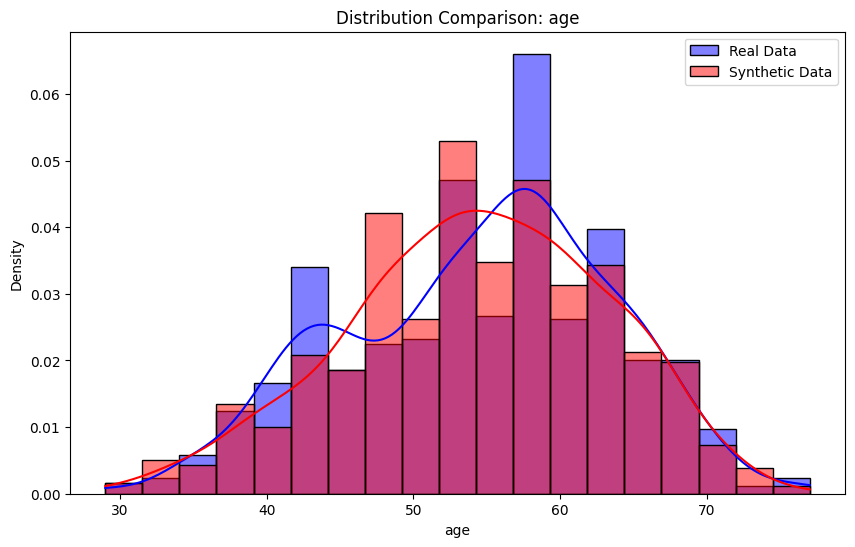

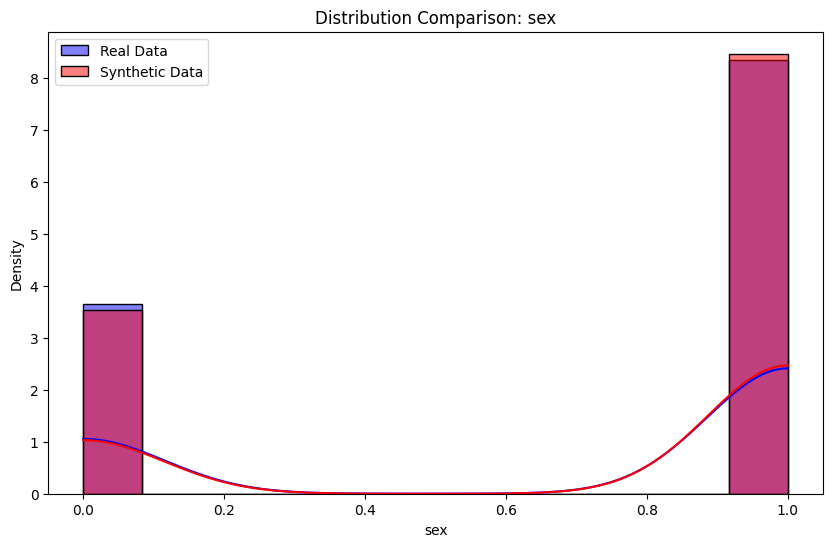

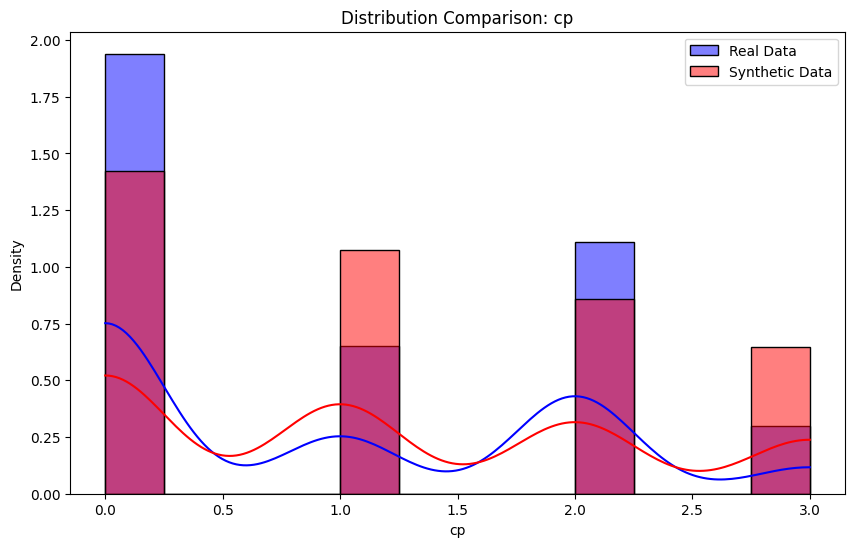

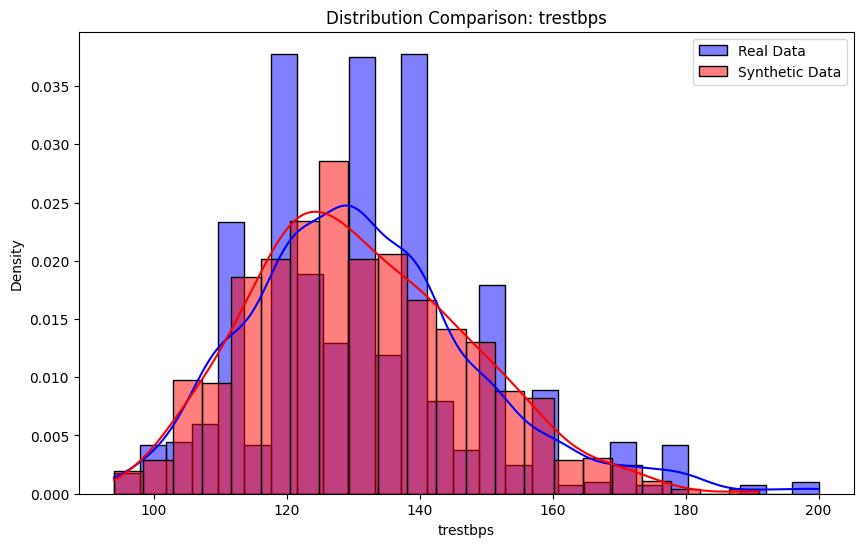

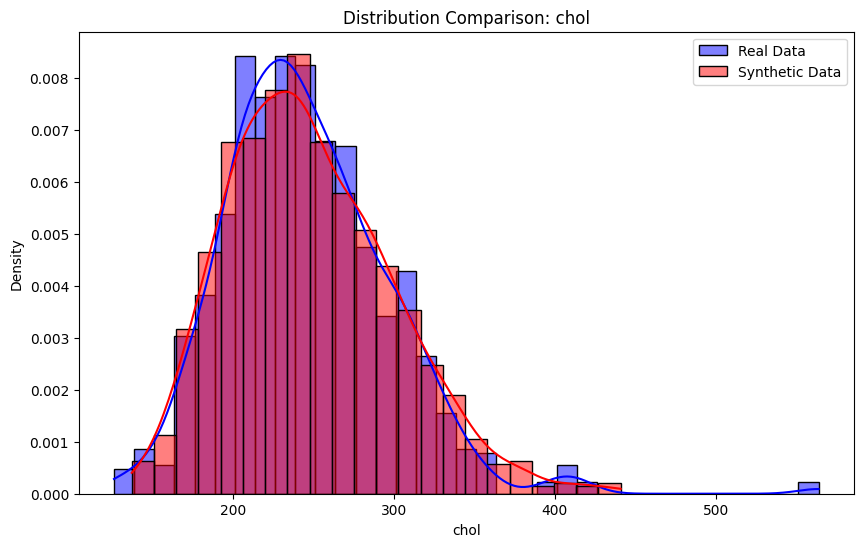

In [ ]:

# Import necessary libraries
import pandas as pd
from sdv.metadata import Metadata
from sdv.multi_table import HMASynthesizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate synthetic data
def generate_synthetic_data(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Detect metadata from data
    metadata = Metadata.detect_from_dataframes({'data': data})

    # Step 3: Visualize metadata
    print('Auto detected data:\n')
    metadata.visualize()

    # Step 4: Dynamically update column types for all columns in the dataset (categorical, numerical, etc.)
    for column_name in data.columns:
        if data[column_name].dtype == 'object':
            metadata.update_column(
                table_name='data',
                column_name=column_name,
                sdtype='categorical'
            )
        elif data[column_name].dtype in ['int64', 'float64']:
            metadata.update_column(
                table_name='data',
                column_name=column_name,
                sdtype='numerical'  # Corrected from 'continuous' to 'numerical'
            )

    # Step 5: Validate metadata and data
    metadata.validate()
    metadata.validate_data(data={'data': data})

    # Step 6: Save metadata to JSON (for future use)
    metadata.save_to_json('metadata2.json')

    # Step 7: Initialize HMASynthesizer with the updated metadata
    synthesizer = HMASynthesizer(metadata)

    # Step 8: Fit the synthesizer to the data
    synthesizer.fit({'data': data})

    # Step 9: Generate synthetic data
    synthetic_data_dict = synthesizer.sample(scale=1)

    # Step 10: Convert the synthetic data dictionary to a DataFrame
    synthetic_data = synthetic_data_dict['data']  # Extract the data from the dictionary
    synthetic_data = pd.DataFrame(synthetic_data)  # Convert it to a DataFrame

    # Step 11: Save synthetic data to a CSV file in Colab
    synthetic_data.to_csv('/content/synthetic_data2.csv', index=False)

    return data, synthetic_data

# Function to automatically select the target column
def select_target_column(data):
    # Automatically select the target column (categorical column with few unique values)
    categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
    potential_target_columns = []

    for col in categorical_columns:
        if data[col].nunique() <= 10:  # Typically, classification targets are categorical with a few unique values
            potential_target_columns.append(col)

    if not potential_target_columns:
        numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
        for col in numerical_columns:
            if data[col].nunique() <= 10:  # Binary classification
                potential_target_columns.append(col)

    if potential_target_columns:
        target_column = min(potential_target_columns, key=lambda col: data[col].nunique())
    else:
        target_column = data.columns[-1]  # Fallback to last column

    return target_column

# Function to evaluate model performance and correlations
def evaluate_synthetic_data(real_data, synthetic_data):
    # Automatically select target column
    target_column = select_target_column(real_data)

    # Step 1: Preprocess data (handle categorical columns and split into train-test sets)

    label_encoders = {}
    for column_name in real_data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        real_data[column_name] = le.fit_transform(real_data[column_name])
        synthetic_data[column_name] = le.transform(synthetic_data[column_name])
        label_encoders[column_name] = le

    # Step 2: Split the data into training and testing
    X_real = real_data.drop(columns=[target_column])
    y_real = real_data[target_column]
    X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

    X_synthetic = synthetic_data.drop(columns=[target_column])
    y_synthetic = synthetic_data[target_column]
    X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

    # Step 3: Train a Random Forest model on the real data
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_real, y_train_real)

    # Step 4: Evaluate the model on the real data
    y_pred_real = rf_model.predict(X_test_real)
    real_accuracy = accuracy_score(y_test_real, y_pred_real)

    # Step 5: Train a Random Forest model on the synthetic data
    rf_model.fit(X_train_synthetic, y_train_synthetic)

    # Step 6: Evaluate the model on the synthetic data
    y_pred_synthetic = rf_model.predict(X_test_synthetic)
    synthetic_accuracy = accuracy_score(y_test_synthetic, y_pred_synthetic)

    # Step 7: Print accuracy results
    print(f"Real Data Model Accuracy: {real_accuracy * 100:.2f}%")
    print(f"Synthetic Data Model Accuracy: {synthetic_accuracy * 100:.2f}%")

    # Step 8: Compare correlations between real and synthetic data
    correlation_real = real_data.corr()
    correlation_synthetic = synthetic_data.corr()

    # Step 9: Print correlation matrices
    print("\nReal Data Correlation Matrix:")
    print(correlation_real)

    print("\nSynthetic Data Correlation Matrix:")
    print(correlation_synthetic)

    # Step 10: Compare feature-wise correlation for real vs synthetic data
    correlation_diff = correlation_real - correlation_synthetic
    print("\nFeature-wise Correlation Difference:")
    print(correlation_diff)

    # Step 11: Visualizing the distribution of synthetic vs real data for key features
    features_to_plot = real_data.select_dtypes(include=['int64', 'float64']).columns[:5]  # Select first 5 numerical features for visualization
    for feature in features_to_plot:
        plt.figure(figsize=(10, 6))
        sns.histplot(real_data[feature], color='blue', label='Real Data', kde=True, stat="density")
        sns.histplot(synthetic_data[feature], color='red', label='Synthetic Data', kde=True, stat="density")
        plt.title(f"Distribution Comparison: {feature}")
        plt.legend()
        plt.show()

# Example usage
file_path = '/content/heart.csv'  # Replace with your actual file path

# Generate synthetic data
real_data, synthetic_data = generate_synthetic_data(file_path)

# Evaluate and compare the performance
evaluate_synthetic_data(real_data, synthetic_data)


In [ ]:
# Install necessary packages if not already installed
!pip install sdv scikit-learn

# Import necessary libraries
import pandas as pd
from sdv.metadata import Metadata
from sdv.multi_table import HMASynthesizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate synthetic data
def generate_synthetic_data(file_path):
    # Step 1: Load the dataset
    data = pd.read_csv(file_path)

    # Step 2: Detect metadata from data
    metadata = Metadata.detect_from_dataframes({'data': data})

    # Step 3: Visualize metadata
    print('Auto detected data:\n')
    metadata.visualize()

    # Step 4: Dynamically update column types for all columns in the dataset (categorical, numerical, etc.)
    for column_name in data.columns:
        if data[column_name].dtype == 'object':
            metadata.update_column(
                table_name='data',
                column_name=column_name,
                sdtype='categorical'
            )
        elif data[column_name].dtype in ['int64', 'float64']:
            metadata.update_column(
                table_name='data',
                column_name=column_name,
                sdtype='numerical'  # Corrected from 'continuous' to 'numerical'
            )

    # Step 5: Validate metadata and data
    metadata.validate()
    metadata.validate_data(data={'data': data})

    # Step 6: Save metadata to JSON (for future use)
    metadata.save_to_json('metadata.json')

    # Step 7: Initialize HMASynthesizer with the updated metadata
    synthesizer = HMASynthesizer(metadata)

    # Step 8: Fit the synthesizer to the data
    synthesizer.fit({'data': data})

    # Step 9: Generate synthetic data
    synthetic_data_dict = synthesizer.sample(scale=1)

    # Step 10: Convert the synthetic data dictionary to a DataFrame
    synthetic_data = synthetic_data_dict['data']  # Extract the data from the dictionary
    synthetic_data = pd.DataFrame(synthetic_data)  # Convert it to a DataFrame

    # Step 11: Save synthetic data to a CSV file in Colab
    synthetic_data.to_csv('/content/synthetic_data.csv', index=False)

    return data, synthetic_data

# Function to automatically select the target column
def select_target_column(data):
    # Automatically select the target column (categorical column with few unique values)
    categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
    potential_target_columns = []

    for col in categorical_columns:
        if data[col].nunique() <= 10:  # Typically, classification targets are categorical with a few unique values
            potential_target_columns.append(col)

    if not potential_target_columns:
        numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
        for col in numerical_columns:
            if data[col].nunique() <= 10:  # Binary classification
                potential_target_columns.append(col)

    if potential_target_columns:
        target_column = min(potential_target_columns, key=lambda col: data[col].nunique())
    else:
        target_column = data.columns[-1]  # Fallback to last column

    return target_column

# Function to evaluate model performance and correlations
def evaluate_synthetic_data(real_data, synthetic_data):
    # Automatically select target column
    target_column = select_target_column(real_data)

    # Step 1: Preprocess data (handle categorical columns and split into train-test sets)

    label_encoders = {}
    for column_name in real_data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        real_data[column_name] = le.fit_transform(real_data[column_name])
        synthetic_data[column_name] = le.transform(synthetic_data[column_name])
        label_encoders[column_name] = le

    # Step 2: Split the data into training and testing
    X_real = real_data.drop(columns=[target_column])
    y_real = real_data[target_column]
    X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

    X_synthetic = synthetic_data.drop(columns=[target_column])
    y_synthetic = synthetic_data[target_column]
    X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

    # Step 3: Train a Random Forest model on the real data
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_real, y_train_real)

    # Step 4: Evaluate the model on the real data
    y_pred_real = rf_model.predict(X_test_real)
    real_accuracy = accuracy_score(y_test_real, y_pred_real)

    # Step 5: Train a Random Forest model on the synthetic data
    rf_model.fit(X_train_synthetic, y_train_synthetic)

    # Step 6: Evaluate the model on the synthetic data
    y_pred_synthetic = rf_model.predict(X_test_synthetic)
    synthetic_accuracy = accuracy_score(y_test_synthetic, y_pred_synthetic)

    # Step 7: Print accuracy results
    print(f"Real Data Model Accuracy: {real_accuracy * 100:.2f}%")
    print(f"Synthetic Data Model Accuracy: {synthetic_accuracy * 100:.2f}%")

    # Step 8: Compare correlations between real and synthetic data
    correlation_real = real_data.corr()
    correlation_synthetic = synthetic_data.corr()

    # Step 9: Print correlation matrices
    print("\nReal Data Correlation Matrix:")
    print(correlation_real)

    print("\nSynthetic Data Correlation Matrix:")
    print(correlation_synthetic)

    # Step 10: Compare feature-wise correlation for real vs synthetic data
    correlation_diff = correlation_real - correlation_synthetic
    print("\nFeature-wise Correlation Difference:")
    print(correlation_diff)

    # Step 11: Visualizing the distribution of synthetic vs real data for key features
    features_to_plot = real_data.select_dtypes(include=['int64', 'float64']).columns[:5]  # Select first 5 numerical features for visualization
    for feature in features_to_plot:
        plt.figure(figsize=(10, 6))
        sns.histplot(real_data[feature], color='blue', label='Real Data', kde=True, stat="density")
        sns.histplot(synthetic_data[feature], color='red', label='Synthetic Data', kde=True, stat="density")
        plt.title(f"Distribution Comparison: {feature}")
        plt.legend()
        plt.show()

# Example usage
file_path = '/content/heart.csv'  # Replace with your actual file path

# Generate synthetic data
real_data, synthetic_data = generate_synthetic_data(file_path)

# Evaluate and compare the performance
evaluate_synthetic_data(real_data, synthetic_data)


In [ ]:
# Install necessary packages if not already installed
!pip install sdv scikit-learn scipy

# Import necessary libraries
import pandas as pd
from sdv.metadata import Metadata
from sdv.multi_table import HMASynthesizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import jensenshannon
import numpy as np

# Function to generate synthetic data
def generate_synthetic_data(file_path):
    data = pd.read_csv(file_path)

    metadata = Metadata.detect_from_dataframes({'data': data})

    for column_name in data.columns:
        if data[column_name].dtype == 'object':
            metadata.update_column('data', column_name, sdtype='categorical')
        elif data[column_name].dtype in ['int64', 'float64']:
            metadata.update_column('data', column_name, sdtype='numerical')

    metadata.validate()
    metadata.validate_data(data={'data': data})

    synthesizer = HMASynthesizer(metadata)
    synthesizer.fit({'data': data})

    synthetic_data_dict = synthesizer.sample(scale=1)
    synthetic_data = pd.DataFrame(synthetic_data_dict['data'])

    synthetic_data.to_csv('/content/synthetic_data.csv', index=False)

    return data, synthetic_data

# Function to automatically select the target column
def select_target_column(data):
    categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
    potential_target_columns = [col for col in categorical_columns if data[col].nunique() <= 10]

    if not potential_target_columns:
        numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
        potential_target_columns = [col for col in numerical_columns if data[col].nunique() <= 10]

    return min(potential_target_columns, key=lambda col: data[col].nunique(), default=data.columns[-1])

# Function to compute quality score based on similarity metrics
def compute_quality_score(real_data, synthetic_data):
    real_corr = real_data.corr()
    synthetic_corr = synthetic_data.corr()

    correlation_diff = np.abs(real_corr - synthetic_corr).mean().mean()

    js_distances = []
    for column in real_data.select_dtypes(include=['int64', 'float64']).columns:
        real_dist = np.histogram(real_data[column], bins=10, density=True)[0]
        synthetic_dist = np.histogram(synthetic_data[column], bins=10, density=True)[0]

        js_distances.append(jensenshannon(real_dist, synthetic_dist))

    js_divergence = np.mean(js_distances)

    quality_score = max(0, 1 - (correlation_diff + js_divergence) / 2)

    return quality_score

# Function to evaluate model performance and synthetic data quality
def evaluate_synthetic_data(real_data, synthetic_data):
    target_column = select_target_column(real_data)

    label_encoders = {}
    for column_name in real_data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        real_data[column_name] = le.fit_transform(real_data[column_name])
        synthetic_data[column_name] = le.transform(synthetic_data[column_name])
        label_encoders[column_name] = le

    X_real = real_data.drop(columns=[target_column])
    y_real = real_data[target_column]
    X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

    X_synthetic = synthetic_data.drop(columns=[target_column])
    y_synthetic = synthetic_data[target_column]
    X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_real, y_train_real)

    y_pred_real = rf_model.predict(X_test_real)
    real_accuracy = accuracy_score(y_test_real, y_pred_real)

    rf_model.fit(X_train_synthetic, y_train_synthetic)
    y_pred_synthetic = rf_model.predict(X_test_synthetic)
    synthetic_accuracy = accuracy_score(y_test_synthetic, y_pred_synthetic)

    print(f"Real Data Model Accuracy: {real_accuracy * 100:.2f}%")
    print(f"Synthetic Data Model Accuracy: {synthetic_accuracy * 100:.2f}%")

    quality_score = compute_quality_score(real_data, synthetic_data)
    print(f"Synthetic Data Quality Score: {quality_score:.2f}")

    correlation_real = real_data.corr()
    correlation_synthetic = synthetic_data.corr()
    correlation_diff = correlation_real - correlation_synthetic

    print("\nReal Data Correlation Matrix:")
    print(correlation_real)

    print("\nSynthetic Data Correlation Matrix:")
    print(correlation_synthetic)

    print("\nFeature-wise Correlation Difference:")
    print(correlation_diff)

    features_to_plot = real_data.select_dtypes(include=['int64', 'float64']).columns[:5]
    for feature in features_to_plot:
        plt.figure(figsize=(10, 6))
        sns.histplot(real_data[feature], color='blue', label='Real Data', kde=True, stat="density")
        sns.histplot(synthetic_data[feature], color='red', label='Synthetic Data', kde=True, stat="density")
        plt.title(f"Distribution Comparison: {feature}")
        plt.legend()
        plt.show()

# Example usage
file_path = '/content/heart.csv'
real_data, synthetic_data = generate_synthetic_data(file_path)
evaluate_synthetic_data(real_data, synthetic_data)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.1/156.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

InvalidMetadataError: Unknown table name ('age').

In [ ]:
#tried using deep synthesizer (sdv) instead of hma coz the latter is used for multitabular data, but it is not present in the sdv package

In [ ]:
#now trying vtae

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Real Data Accuracy: 98.54%
Synthetic Data Accuracy: 87.80%
Correlation Difference Score: 0.1269
Synthetic Data Quality Score: 87.31%


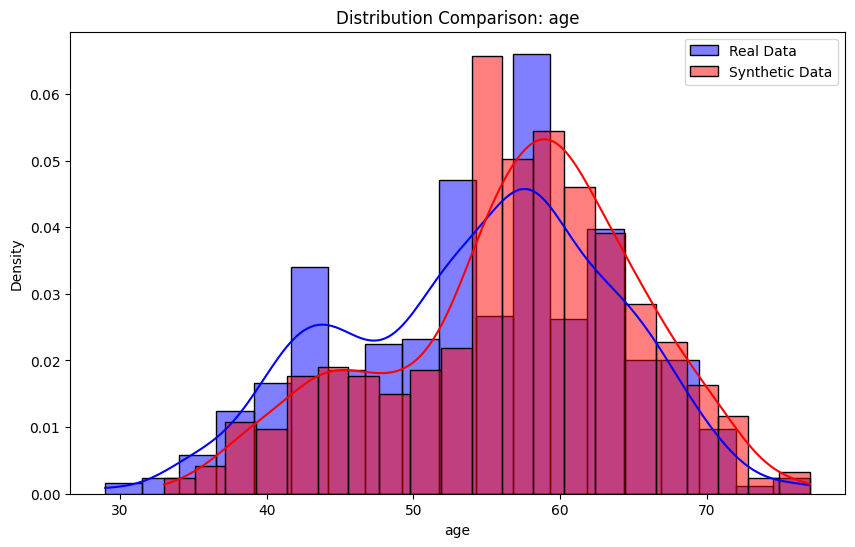

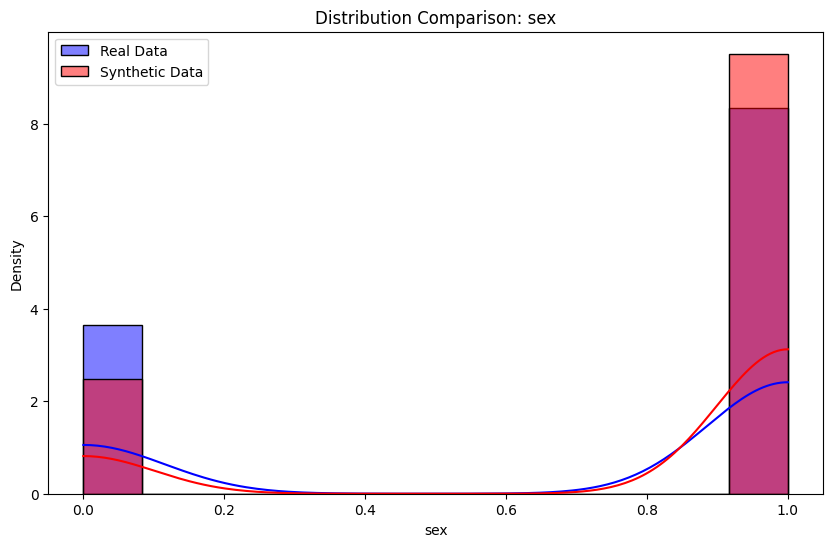

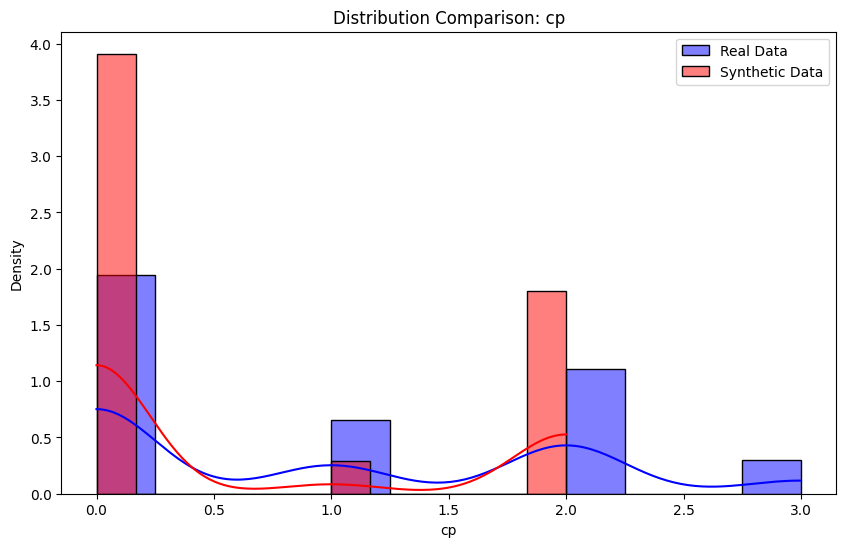

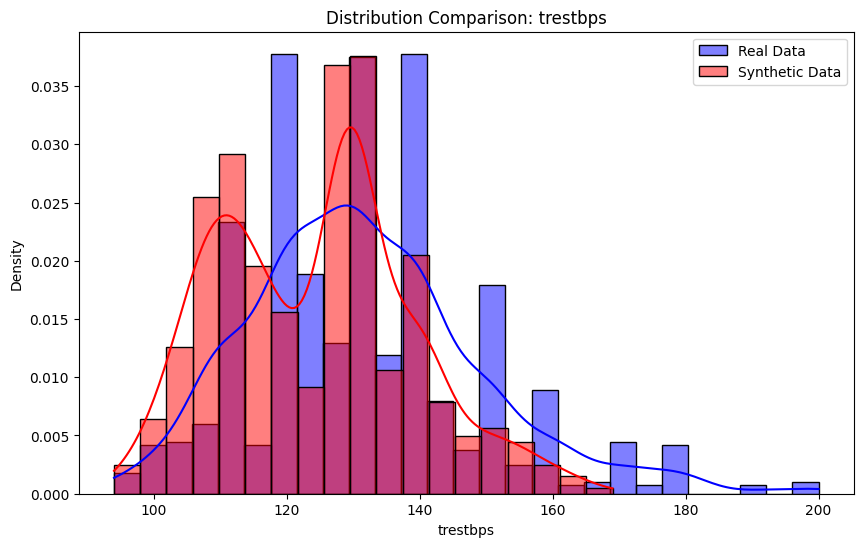

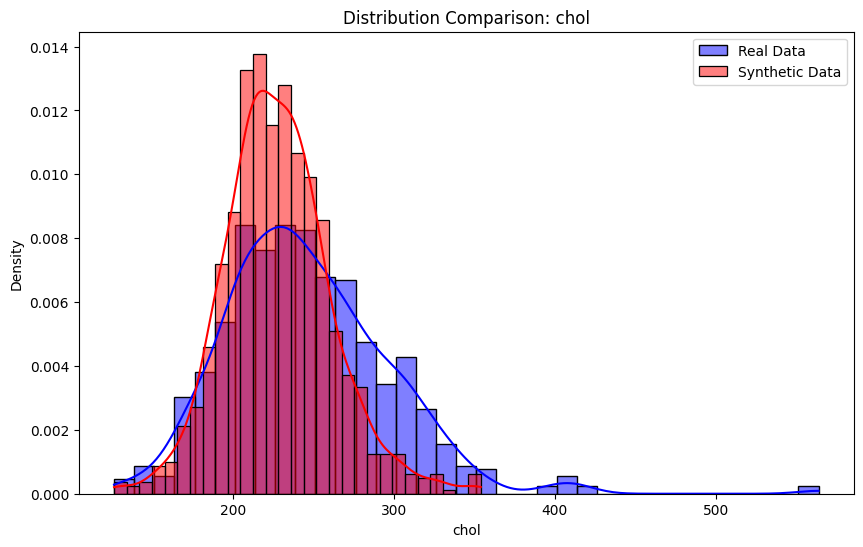

In [ ]:
# Install necessary packages if not installed
!pip install sdv scikit-learn pandas matplotlib seaborn

# Import necessary libraries
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.single_table import TVAESynthesizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to generate synthetic data using TVAE
def generate_synthetic_data(file_path):
    # Load dataset
    data = pd.read_csv(file_path)

    # Detect metadata automatically
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(data)

    # Encode categorical columns
    for column in data.select_dtypes(include=['object']).columns:
        data[column] = LabelEncoder().fit_transform(data[column])

    # Initialize TVAE synthesizer
    synthesizer = TVAESynthesizer(metadata)
    synthesizer.fit(data)

    # Generate synthetic data
    synthetic_data = synthesizer.sample(num_rows=len(data))

    # Save synthetic data
    synthetic_data.to_csv('/content/synthetic_data.csv', index=False)

    return data, synthetic_data

# Function to automatically select the target column
def select_target_column(data):
    categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
    potential_target_columns = [col for col in categorical_columns if data[col].nunique() <= 10]

    if not potential_target_columns:
        numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
        potential_target_columns = [col for col in numerical_columns if data[col].nunique() <= 10]

    return potential_target_columns[0] if potential_target_columns else data.columns[-1]

# Function to evaluate model performance and synthetic data quality
def evaluate_synthetic_data(real_data, synthetic_data):
    target_column = select_target_column(real_data)

    # Encode categorical variables
    label_encoders = {}
    for column in real_data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        real_data[column] = le.fit_transform(real_data[column])
        synthetic_data[column] = le.transform(synthetic_data[column])
        label_encoders[column] = le

    # Split into train-test sets
    X_real, y_real = real_data.drop(columns=[target_column]), real_data[target_column]
    X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

    X_synthetic, y_synthetic = synthetic_data.drop(columns=[target_column]), synthetic_data[target_column]
    X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

    # Train Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_real, y_train_real)
    real_accuracy = accuracy_score(y_test_real, rf_model.predict(X_test_real))

    rf_model.fit(X_train_synthetic, y_train_synthetic)
    synthetic_accuracy = accuracy_score(y_test_synthetic, rf_model.predict(X_test_synthetic))

    # Compute correlation differences
    correlation_real = real_data.corr()
    correlation_synthetic = synthetic_data.corr()
    correlation_diff = (correlation_real - correlation_synthetic).abs().mean().mean()

    # Compute synthetic data quality score
    quality_score = (1 - correlation_diff) * 100

    # Print results
    print(f"Real Data Accuracy: {real_accuracy * 100:.2f}%")
    print(f"Synthetic Data Accuracy: {synthetic_accuracy * 100:.2f}%")
    print(f"Correlation Difference Score: {correlation_diff:.4f}")
    print(f"Synthetic Data Quality Score: {quality_score:.2f}%")

    # Plot feature distributions
    for feature in real_data.select_dtypes(include=['int64', 'float64']).columns[:5]:
        plt.figure(figsize=(10, 6))
        sns.histplot(real_data[feature], color='blue', label='Real Data', kde=True, stat="density")
        sns.histplot(synthetic_data[feature], color='red', label='Synthetic Data', kde=True, stat="density")
        plt.title(f"Distribution Comparison: {feature}")
        plt.legend()
        plt.show()

# Example usage
file_path = '/content/heart.csv'  # Replace with your actual file path

# Generate synthetic data
real_data, synthetic_data = generate_synthetic_data(file_path)

# Evaluate and compare the performance
evaluate_synthetic_data(real_data, synthetic_data)


In [ ]:
#trying gaussian copula synthesizer in sdv

In [2]:
!pip install sdv scikit-learn pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.1/156.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.

In [ ]:
#

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Real Data Accuracy: 98.54%
Synthetic Data Accuracy: 62.44%
Correlation Difference Score: 0.0836
Synthetic Data Quality Score: 91.64%


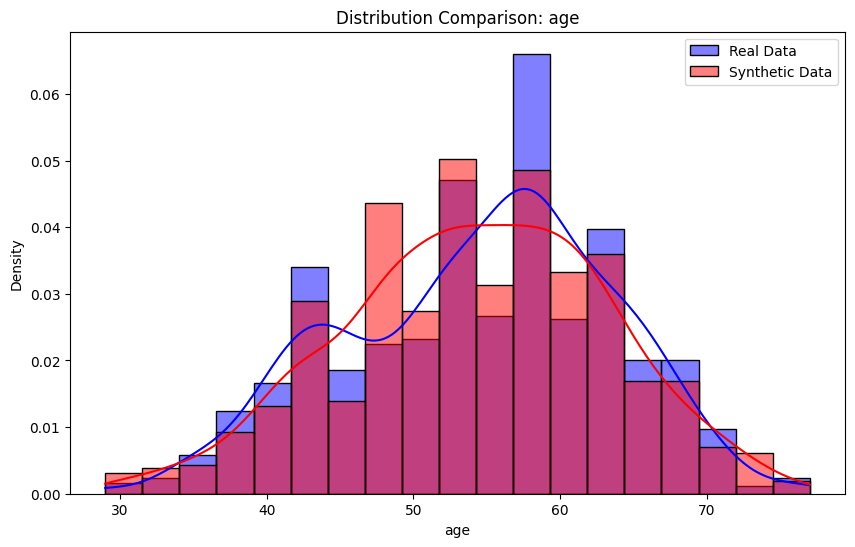

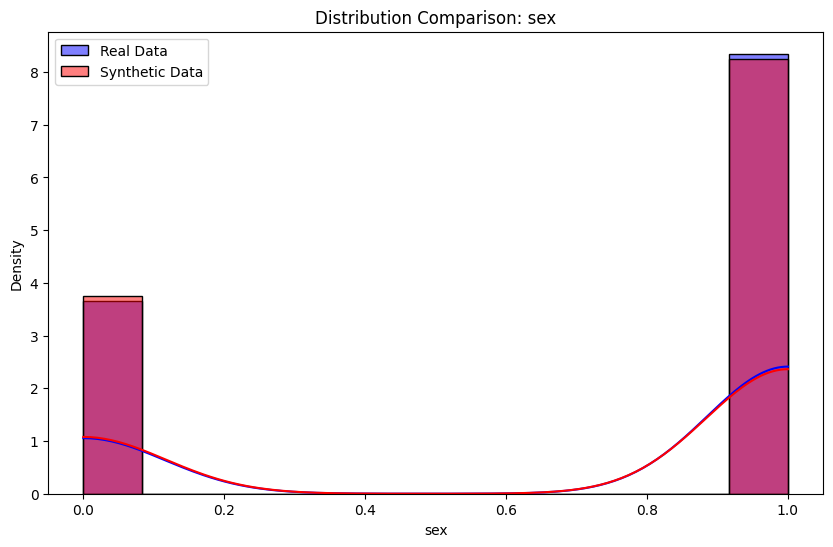

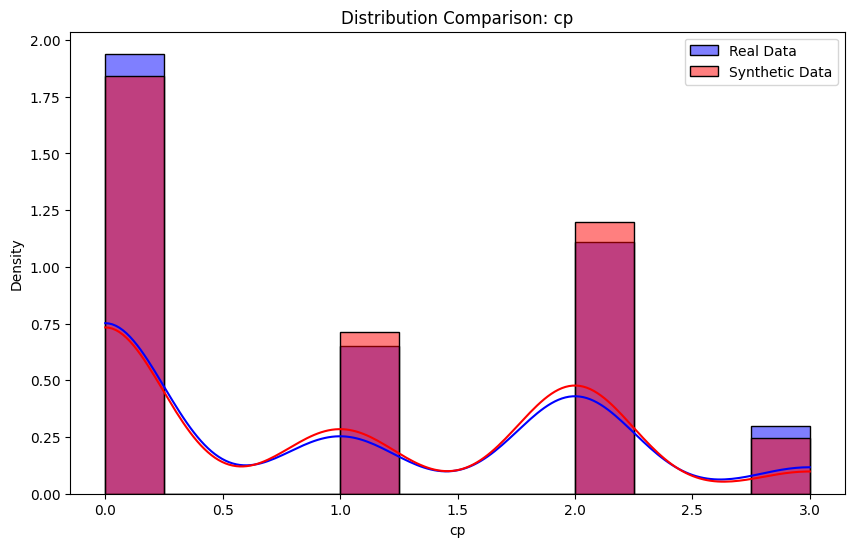

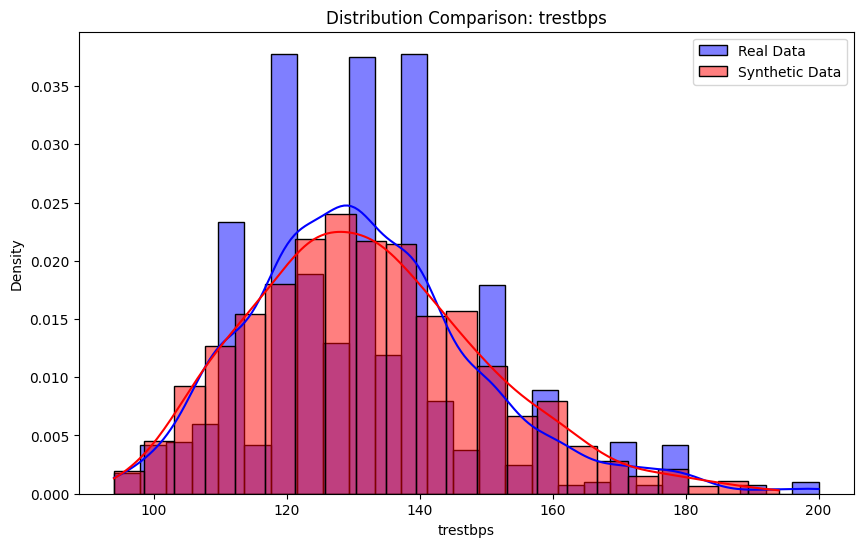

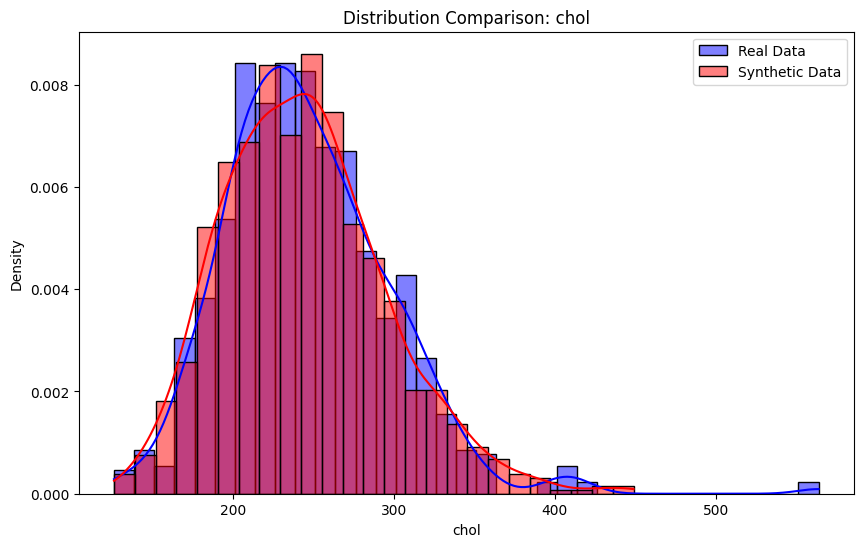

In [3]:
!pip install sdv
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and preprocess data
file_path = "/content/heart.csv"
data = pd.read_csv(file_path)

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# Generate synthetic data
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data)
synthetic_data = synthesizer.sample(num_rows=len(data))

# Evaluate
def evaluate_synthetic_data(real_data, synthetic_data):
    target_column = real_data.columns[-1]
    for column in real_data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        real_data[column] = le.fit_transform(real_data[column])
        synthetic_data[column] = le.transform(synthetic_data[column])

    X_real, y_real = real_data.drop(columns=[target_column]), real_data[target_column]
    X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
    X_synthetic, y_synthetic = synthetic_data.drop(columns=[target_column]), synthetic_data[target_column]
    X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_real, y_train_real)
    real_accuracy = accuracy_score(y_test_real, rf_model.predict(X_test_real))

    rf_model.fit(X_train_synthetic, y_train_synthetic)
    synthetic_accuracy = accuracy_score(y_test_synthetic, rf_model.predict(X_test_synthetic))

    correlation_diff = (real_data.corr() - synthetic_data.corr()).abs().mean().mean()
    quality_score = (1 - correlation_diff) * 100

    print(f"Real Data Accuracy: {real_accuracy * 100:.2f}%")
    print(f"Synthetic Data Accuracy: {synthetic_accuracy * 100:.2f}%")
    print(f"Correlation Difference Score: {correlation_diff:.4f}")
    print(f"Synthetic Data Quality Score: {quality_score:.2f}%")

    for feature in real_data.select_dtypes(include=['int64', 'float64']).columns[:5]:
        plt.figure(figsize=(10, 6))
        sns.histplot(real_data[feature], color='blue', label='Real Data', kde=True, stat="density")
        sns.histplot(synthetic_data[feature], color='red', label='Synthetic Data', kde=True, stat="density")
        plt.title(f"Distribution Comparison: {feature}")
        plt.legend()
        plt.show()

evaluate_synthetic_data(data, synthetic_data)


In [ ]:
#changed the target col to be detected automatically

Final Detected Target Column: target


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Real Data Accuracy: 98.54%
Synthetic Data Accuracy: 62.44%
Correlation Difference Score: 0.0836
Synthetic Data Quality Score: 91.64%


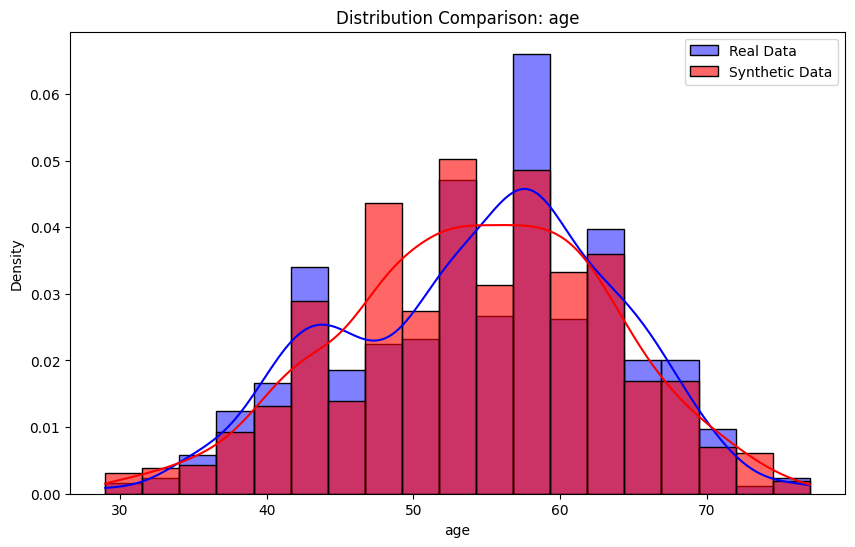

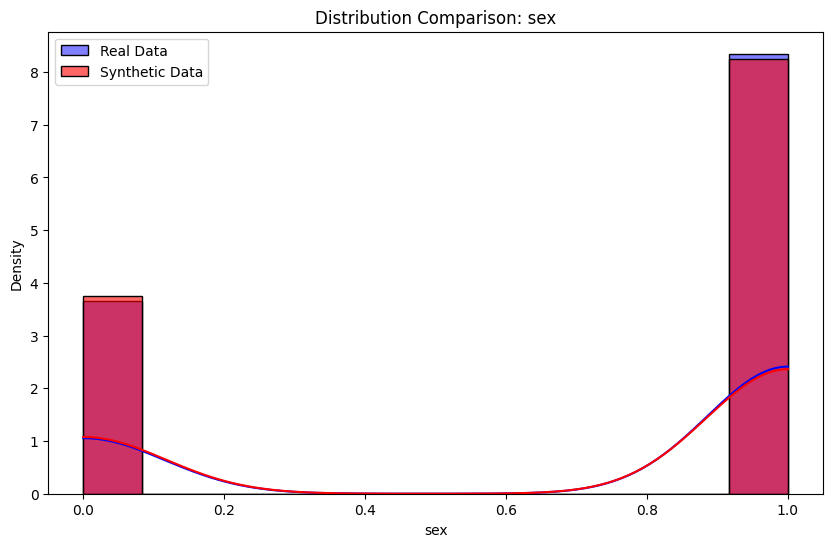

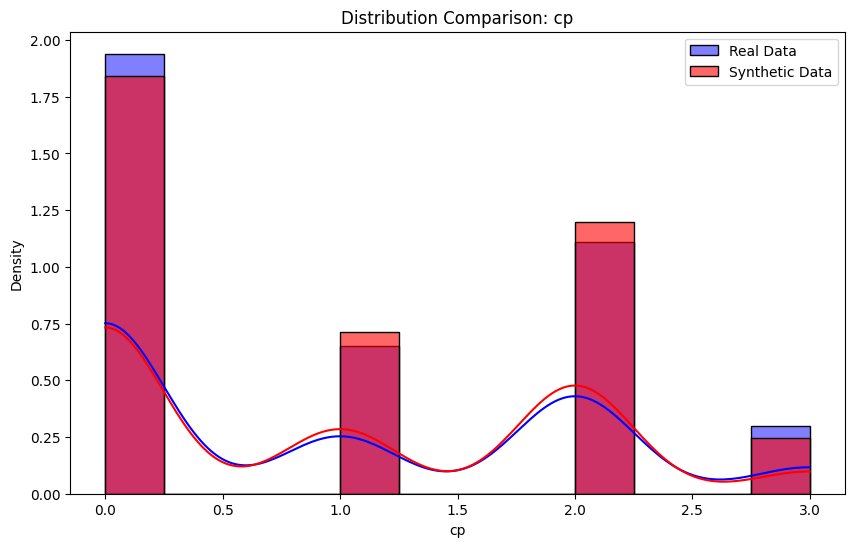

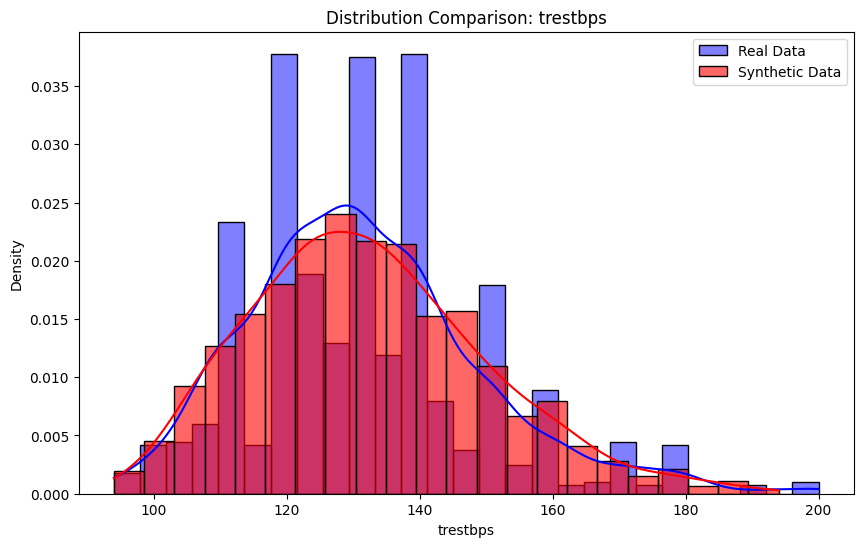

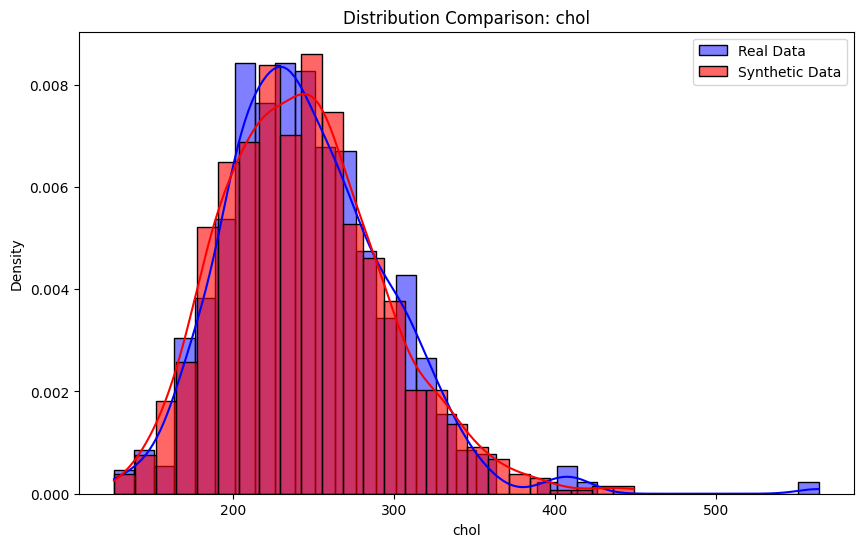

In [6]:
# Install necessary packages
!pip install sdv scikit-learn matplotlib seaborn

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "/content/heart.csv"  # Change to your file path
data = pd.read_csv(file_path)

# Automatically detect the target column
# Function to detect target column with improved logic
def detect_target_column(df, known_target=None):
    if known_target and known_target in df.columns:
        return known_target  # Use manually specified target column

    # Identify categorical columns with a limited number of unique values
    categorical_cols = df.select_dtypes(include=['object', 'int64']).columns.tolist()
    possible_targets = [col for col in categorical_cols if df[col].nunique() <= 10]

    if len(possible_targets) == 1:
        return possible_targets[0]  # If only one suitable column is found, use it
    elif len(possible_targets) > 1:
        print(f"Multiple possible target columns detected: {possible_targets}")
        return df.columns[-1]  # Default to the last column as a fallback

    return df.columns[-1]  # If no categorical target is found, use last column

# Define the correct target column explicitly (update if needed)
target_column = detect_target_column(data, known_target='target')  # Update 'target' if needed
print(f"Final Detected Target Column: {target_column}")


# Encode categorical columns
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Generate synthetic data using GaussianCopula
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data)
synthetic_data = synthesizer.sample(num_rows=len(data))

# Evaluate the synthetic data
def evaluate_synthetic_data(real_data, synthetic_data, target_column):
    # Encode categorical values
    for column in real_data.select_dtypes(include=['object']).columns:
        if column in label_encoders:
            synthetic_data[column] = label_encoders[column].transform(synthetic_data[column])

    # Split into features and target
    X_real, y_real = real_data.drop(columns=[target_column]), real_data[target_column]
    X_synthetic, y_synthetic = synthetic_data.drop(columns=[target_column]), synthetic_data[target_column]

    # Train/test split
    X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
    X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

    # Train a classifier on real and synthetic data
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_real, y_train_real)
    real_accuracy = accuracy_score(y_test_real, rf_model.predict(X_test_real))

    rf_model.fit(X_train_synthetic, y_train_synthetic)
    synthetic_accuracy = accuracy_score(y_test_synthetic, rf_model.predict(X_test_synthetic))

    # Calculate correlation difference
    correlation_diff = (real_data.corr() - synthetic_data.corr()).abs().mean().mean()
    quality_score = (1 - correlation_diff) * 100

    # Print results
    print(f"Real Data Accuracy: {real_accuracy * 100:.2f}%")
    print(f"Synthetic Data Accuracy: {synthetic_accuracy * 100:.2f}%")
    print(f"Correlation Difference Score: {correlation_diff:.4f}")
    print(f"Synthetic Data Quality Score: {quality_score:.2f}%")

    # Visualize distributions
    for feature in real_data.select_dtypes(include=['int64', 'float64']).columns[:5]:
        plt.figure(figsize=(10, 6))
        sns.histplot(real_data[feature], color='blue', label='Real Data', kde=True, stat="density")
        sns.histplot(synthetic_data[feature], color='red', label='Synthetic Data', kde=True, stat="density", alpha=0.6)
        plt.title(f"Distribution Comparison: {feature}")
        plt.legend()
        plt.show()

# Call evaluation function
evaluate_synthetic_data(data, synthetic_data, target_column)


In [ ]:
#fine tuning

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Real Data Accuracy: 98.54%
Synthetic Data Accuracy: 65.37%

Feature-wise Correlation Difference:
                age       sex        cp  trestbps      chol       fbs  \
age       0.000000 -0.044237 -0.053564  0.010687 -0.003169  0.057877   
sex      -0.044237  0.000000 -0.014798 -0.027627 -0.093965  0.045806   
cp       -0.053564 -0.014798  0.000000  0.043497 -0.011904  0.060222   
trestbps  0.010687 -0.027627  0.043497  0.000000 -0.013722  0.135803   
chol     -0.003169 -0.093965 -0.011904 -0.013722  0.000000  0.016595   
fbs       0.057877  0.045806  0.060222  0.135803  0.016595  0.000000   
restecg  -0.060221 -0.124018 -0.016229 -0.027144 -0.045924 -0.105382   
thalach   0.028523 -0.062431  0.115291  0.020892  0.021425  0.027446   
exang    -0.025738  0.101651 -0.218061  0.007424 -0.047020 -0.033747   
oldpeak   0.017302  0.094586 -0.074039  0.050355 -0.007118  0.013884   
slope    -0.046526 -0.058981  0.110532 -0.015884  0.012201 -0.051245   
ca        0.245979  0.080473 -0.168278

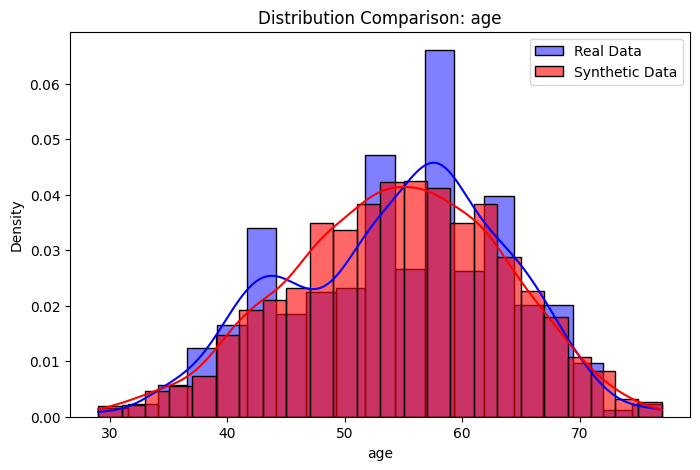

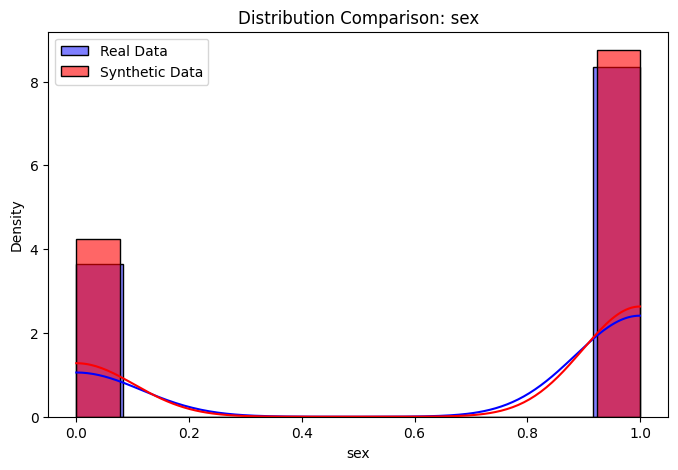

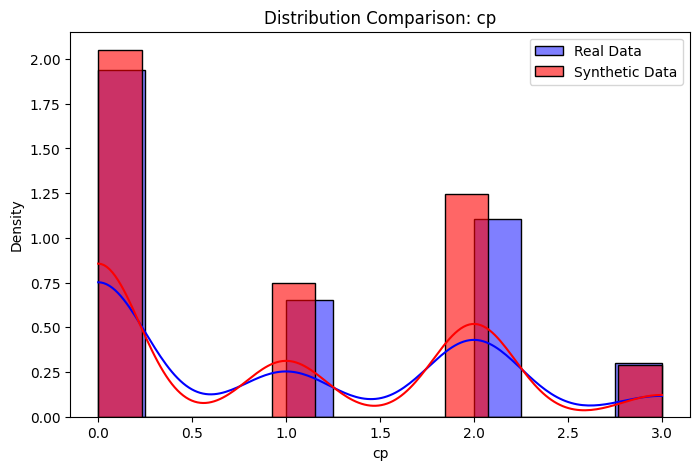

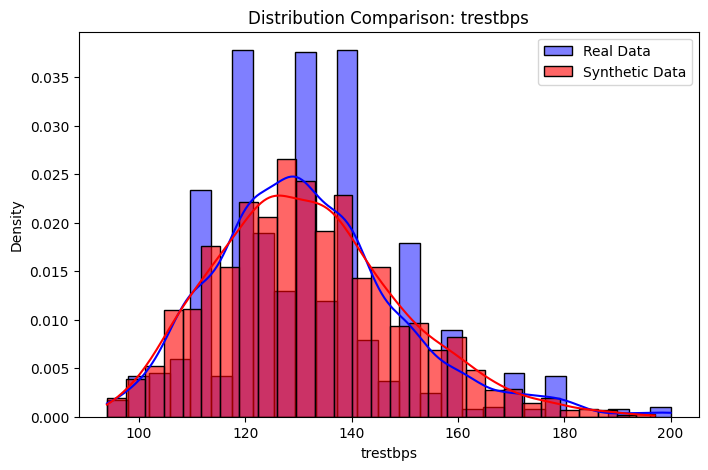

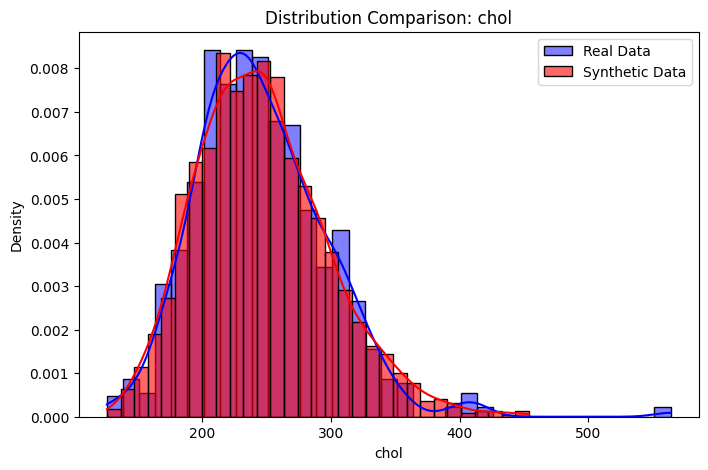

In [4]:
# Install required libraries if not already installed
!pip install sdv scikit-learn matplotlib seaborn

# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/heart.csv'  # Replace with your dataset path
real_data = pd.read_csv(file_path)

# Define metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)

# Fine-tuning GaussianCopulaSynthesizer
synthesizer = GaussianCopulaSynthesizer(
    metadata,
    enforce_min_max_values=True,  # Ensures generated data stays within real min/max values
    enforce_rounding=True  # Preserves integer distributions
)

# Train the synthesizer on the real data
synthesizer.fit(real_data)

# Generate synthetic data (increased size for better distribution matching)
synthetic_data = synthesizer.sample(num_rows=len(real_data) * 2)  # 2x more data for better matching

# Ensure correct data types after generation
synthetic_data = synthetic_data.astype(real_data.dtypes)

# Automatically select the target column (for classification comparison)
def select_target_column(data):
    categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
    for col in categorical_cols:
        if data[col].nunique() <= 10:  # Choose categorical column with few unique values
            return col
    return data.columns[-1]  # Fallback: last column if no categorical found

target_column = select_target_column(real_data)

# Encode categorical values for model training
label_encoders = {}
for column in real_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    real_data[column] = le.fit_transform(real_data[column])
    synthetic_data[column] = le.transform(synthetic_data[column])
    label_encoders[column] = le

# Train/test split for real and synthetic data
X_real, y_real = real_data.drop(columns=[target_column]), real_data[target_column]
X_synthetic, y_synthetic = synthetic_data.drop(columns=[target_column]), synthetic_data[target_column]

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

# Train a classifier on real and synthetic data
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)  # Increased depth & estimators
rf_model.fit(X_train_real, y_train_real)
real_accuracy = accuracy_score(y_test_real, rf_model.predict(X_test_real))

rf_model.fit(X_train_synthetic, y_train_synthetic)
synthetic_accuracy = accuracy_score(y_test_synthetic, rf_model.predict(X_test_synthetic))

print(f"Real Data Accuracy: {real_accuracy * 100:.2f}%")
print(f"Synthetic Data Accuracy: {synthetic_accuracy * 100:.2f}%")

# Correlation comparison
corr_real = real_data.corr()
corr_synthetic = synthetic_data.corr()
corr_diff = corr_real - corr_synthetic
print("\nFeature-wise Correlation Difference:\n", corr_diff)

# Visualizing data distributions
num_features = real_data.select_dtypes(include=['int64', 'float64']).columns[:5]
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(real_data[feature], color='blue', label='Real Data', kde=True, stat="density")
    sns.histplot(synthetic_data[feature], color='red', label='Synthetic Data', kde=True, stat="density", alpha=0.6)
    plt.title(f"Distribution Comparison: {feature}")
    plt.legend()
    plt.show()
